In [1]:
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np



In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

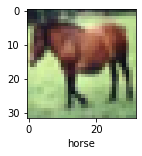

In [7]:
plot_sample(X_train,y_train,7)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
# ann = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32, 3)),
#     keras.layers.Dense(3000, activation='relu'),
#     keras.layers.Dense(1000, activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

# ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])


# ann.fit(X_train,y_train,epochs=5)

In [10]:
# from sklearn.metrics import confusion_matrix,classification_report
# y_pred = ann.predict(X_test)
# y_pred_classes = [np.argmax(element) for element in y_pred]

# print('Classification Report: \n',classification_report(y_test,y_pred_classes))

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [13]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4770 - accuracy: 0.4659
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1199 - accuracy: 0.6075
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9900 - accuracy: 0.6553
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9140 - accuracy: 0.6823
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8465 - accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7995 - accuracy: 0.7222
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7473 - accuracy: 0.7405
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7052 - accuracy: 0.7567
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6723 - accuracy: 0.7675
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.63

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8890 - accuracy: 0.7086


[0.8889755606651306, 0.7085999846458435]

In [16]:
y_test = y_test.reshape(-1,)

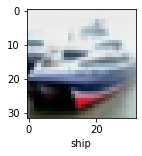

In [17]:
plot_sample(X_test,y_test,1)

In [18]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_classes = [np.argmax(element) for element in y_pred]

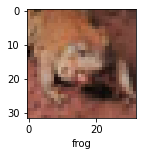

In [29]:
plot_sample(X_test,y_test,5)

In [30]:
classes[y_classes[5]]

'frog'

In [31]:
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.79      0.85      0.82      1000
           2       0.64      0.57      0.61      1000
           3       0.63      0.38      0.47      1000
           4       0.68      0.58      0.63      1000
           5       0.58      0.71      0.63      1000
           6       0.75      0.80      0.78      1000
           7       0.73      0.77      0.75      1000
           8       0.78      0.86      0.82      1000
           9       0.77      0.78      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

